## LSTM Predictions on Closing Stock Price and Stock Returns for AAPL Stock

This notebook contains the LSTM done by our group.

1. Predicting Closing Stock Price for AAPL using Closing Price and Volume
2. Predicting Stock Returns for AAPL using Returns, Closing Price, and Volume

In [96]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
            
from datetime import date

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



In [97]:
# Input ticker - Using META as example
aapl_ticker = yf.Ticker("AAPL")

# Getting historical data of META
aapl_historical = aapl_ticker.history(period='3y')
aapl_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-11-05 00:00:00-05:00,62.768081,63.046457,62.589830,62.787621,79897600,0.0000,0.0
2019-11-06 00:00:00-05:00,62.699704,62.875519,62.357845,62.814472,75864400,0.0000,0.0
2019-11-07 00:00:00-05:00,63.370441,63.764765,63.216141,63.539436,94940400,0.1925,0.0
2019-11-08 00:00:00-05:00,63.358212,63.786821,62.907561,63.713348,69986400,0.0000,0.0
2019-11-11 00:00:00-05:00,63.262681,64.283998,63.257785,64.217873,81821200,0.0000,0.0
...,...,...,...,...,...,...,...
2022-10-31 00:00:00-04:00,152.906350,153.984563,151.668398,153.086044,97943200,0.0000,0.0
2022-11-01 00:00:00-04:00,154.823169,155.192551,148.883026,150.400497,80379300,0.0000,0.0
2022-11-02 00:00:00-04:00,148.703316,151.917985,144.759861,144.789810,93604600,0.0000,0.0


In [99]:
# Saving 3 year historical of AAPL Stock
aapl_historical.to_csv('../Data/1_Scraped/Structured_Data/aapl_historical_3year.csv')

### AAPL Closing Price Plot

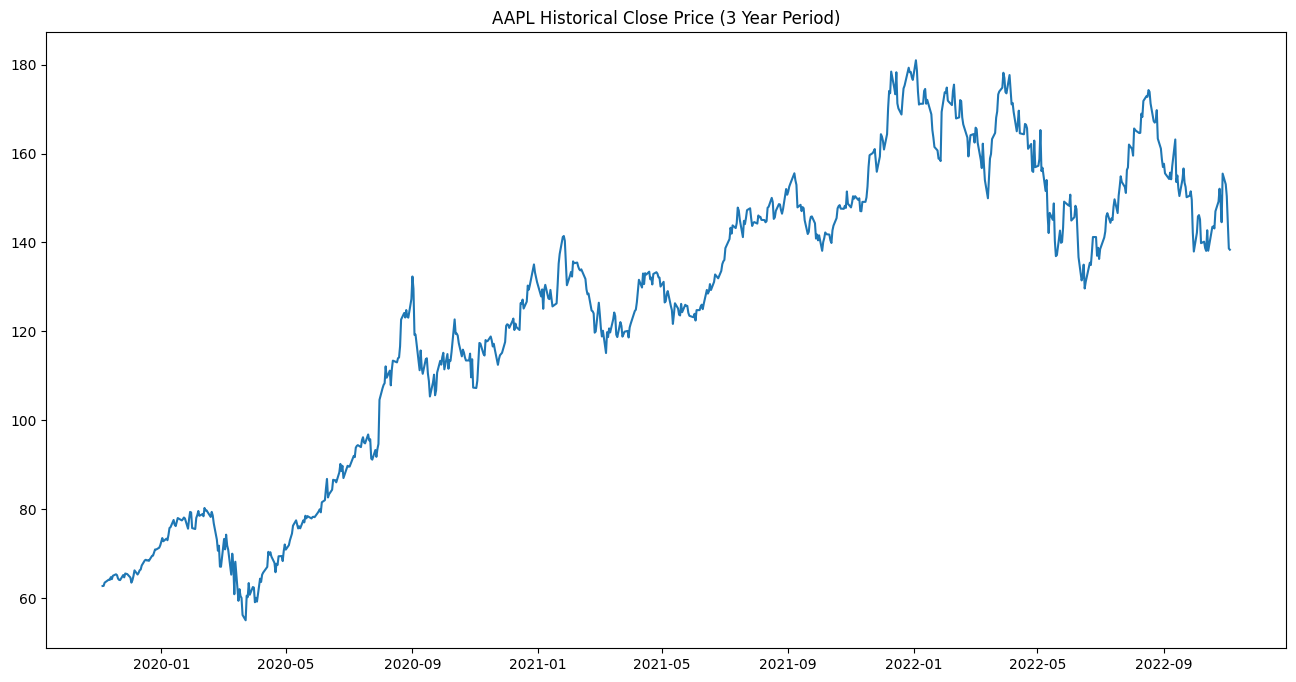

In [83]:
plt.figure(figsize=(16,8))
plt.plot(aapl_historical.index, aapl_historical["Close"], label='Close Price History')

plt.title('AAPL Historical Close Price (3 Year Period)')
plt.show()

### AAPL Volume Traded Plot

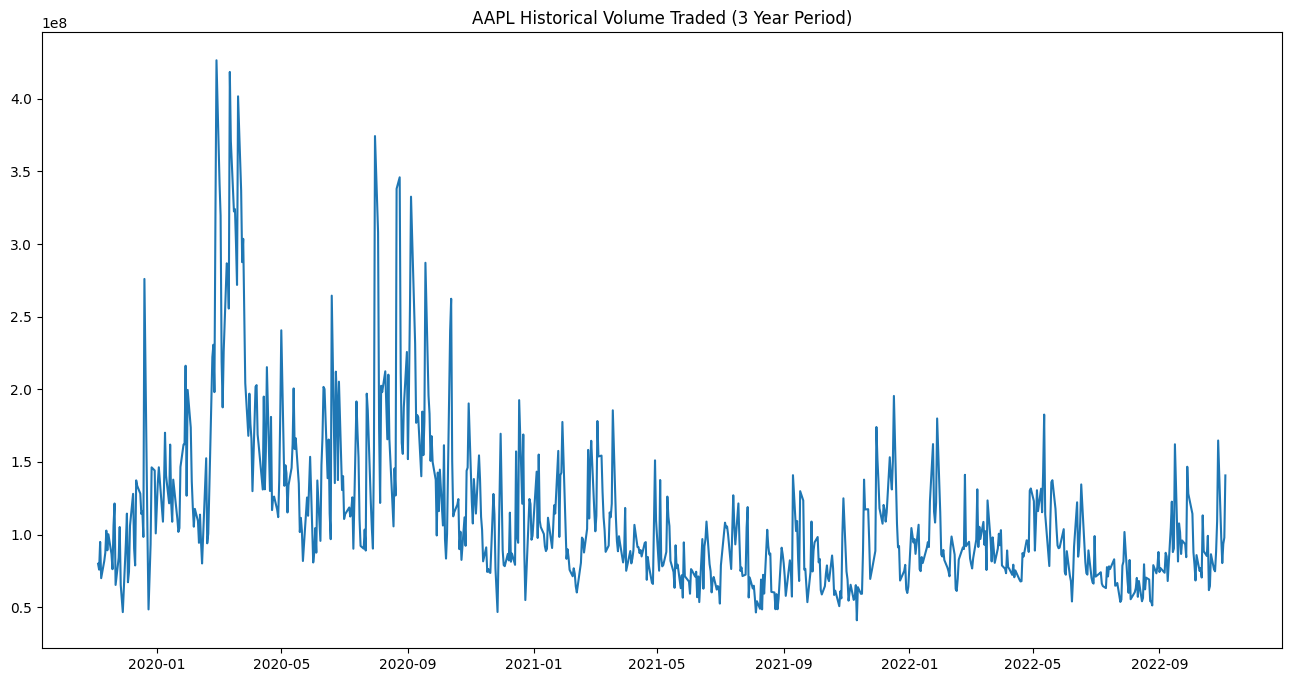

In [84]:
plt.figure(figsize=(16,8))
plt.plot(aapl_historical.index, aapl_historical["Volume"], label='Volume Traded History')

plt.title('AAPL Historical Volume Traded (3 Year Period)')
plt.show()

### Predicting Close Price using Closing Price and Volume Traded
We are able to predict the closing price, we will provide valuable information to investors as they will know whether to long or short the stock.


In [85]:
# Normalizing
aapl_historical_close = aapl_historical[['Close', 'Volume']]

# Spliting into Train and Test Data
train_test_split = int(len(aapl_historical_close) * 0.8)
aapl_historical_x_train = aapl_historical_close.iloc[:train_test_split]
aapl_historical_x_test = aapl_historical_close.iloc[train_test_split:]


# Scaling based on Training Data
scaler_price = MinMaxScaler(feature_range=(0,1))
scaled_price_data = scaler_price.fit_transform(aapl_historical_x_train) # scale only after split

x_train_data, y_train_data = [], []
num_input_points = 60

# Creating Training Data
for i in range(num_input_points, train_test_split):
    x_train_data.append(scaled_price_data[i-num_input_points:i])
    y_train_data.append(scaled_price_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 2)) # shape is ((2019, 60), 1)

In [86]:
print(x_train_data.shape)
print(y_train_data.shape)

(545, 60, 2)
(545,)


### Building LSTM Model for Predicting Price

In [64]:
# Building the LSTM Model
lstm_model_price = Sequential()
lstm_model_price.add(LSTM(units=100, return_sequences=True, input_shape=(x_train_data.shape[1], 2)))
lstm_model_price.add(LSTM(units=100))
lstm_model_price.add(Dense(25))
lstm_model_price.add(Dense(1)) 
lstm_model_price.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])
lstm_model_price.fit(x_train_data,y_train_data,epochs=30,batch_size=1,verbose=1)

Epoch 1/30


2022-11-06 16:44:00.550456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-06 16:44:00.736358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-06 16:44:00.846237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-06 16:44:00.957490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/545 [..............................] - ETA: 15:36 - loss: 0.0256 - mean_squared_error: 0.0256

2022-11-06 16:44:01.133109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


545/545 [==============================] - 20s 33ms/step - loss: 0.0065 - mean_squared_error: 0.0065
Epoch 2/30
545/545 [==============================] - 18s 33ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 3/30
545/545 [==============================] - 18s 33ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 4/30
545/545 [==============================] - 18s 33ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 5/30
545/545 [==============================] - 18s 32ms/step - loss: 0.0013 - mean_squared_error: 0.0013
Epoch 6/30
545/545 [==============================] - 18s 32ms/step - loss: 0.0014 - mean_squared_error: 0.0014
Epoch 7/30
545/545 [==============================] - 18s 33ms/step - loss: 0.0012 - mean_squared_error: 0.0012
Epoch 8/30
545/545 [==============================] - 18s 33ms/step - loss: 9.3904e-04 - mean_squared_error: 9.3904e-04
Epoch 9/30
545/545 [==============================] - 18s 33ms/step - loss: 9.4810e-04 - mean_squared_error

In [68]:
# Saving trained LSTM Model for Predicting Price

lstm_model_price.save("LSTM_Model_Predicting_Closing_Price_epoch30_batchsize1.h5")

### Preparing Test Data for Stock Price

In [87]:
# Preparing Test data
test_input = aapl_historical_close.iloc[train_test_split - num_input_points:]
test_input = scaler_price.transform(test_input) 

X_test = []
# Creating Test Data
for i in range(num_input_points, test_input.shape[0]):
    X_test.append(test_input[i - num_input_points:i])
X_test = np.array(X_test)

predicted_closing_price = lstm_model_price.predict(X_test)
temp_column = np.zeros((predicted_closing_price.shape[0],1), dtype=int)
inverse_input = np.append(predicted_closing_price, temp_column, axis=1)

predicted_closing_price = scaler_price.inverse_transform(inverse_input)[:,0]


5/5 [==============================] - 0s 21ms/step


/var/folders/kz/rvchp60d4w32sw9xqslynkzm0000gn/T/ipykernel_1122/192583874.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_price['Predictions'] = predicted_closing_price


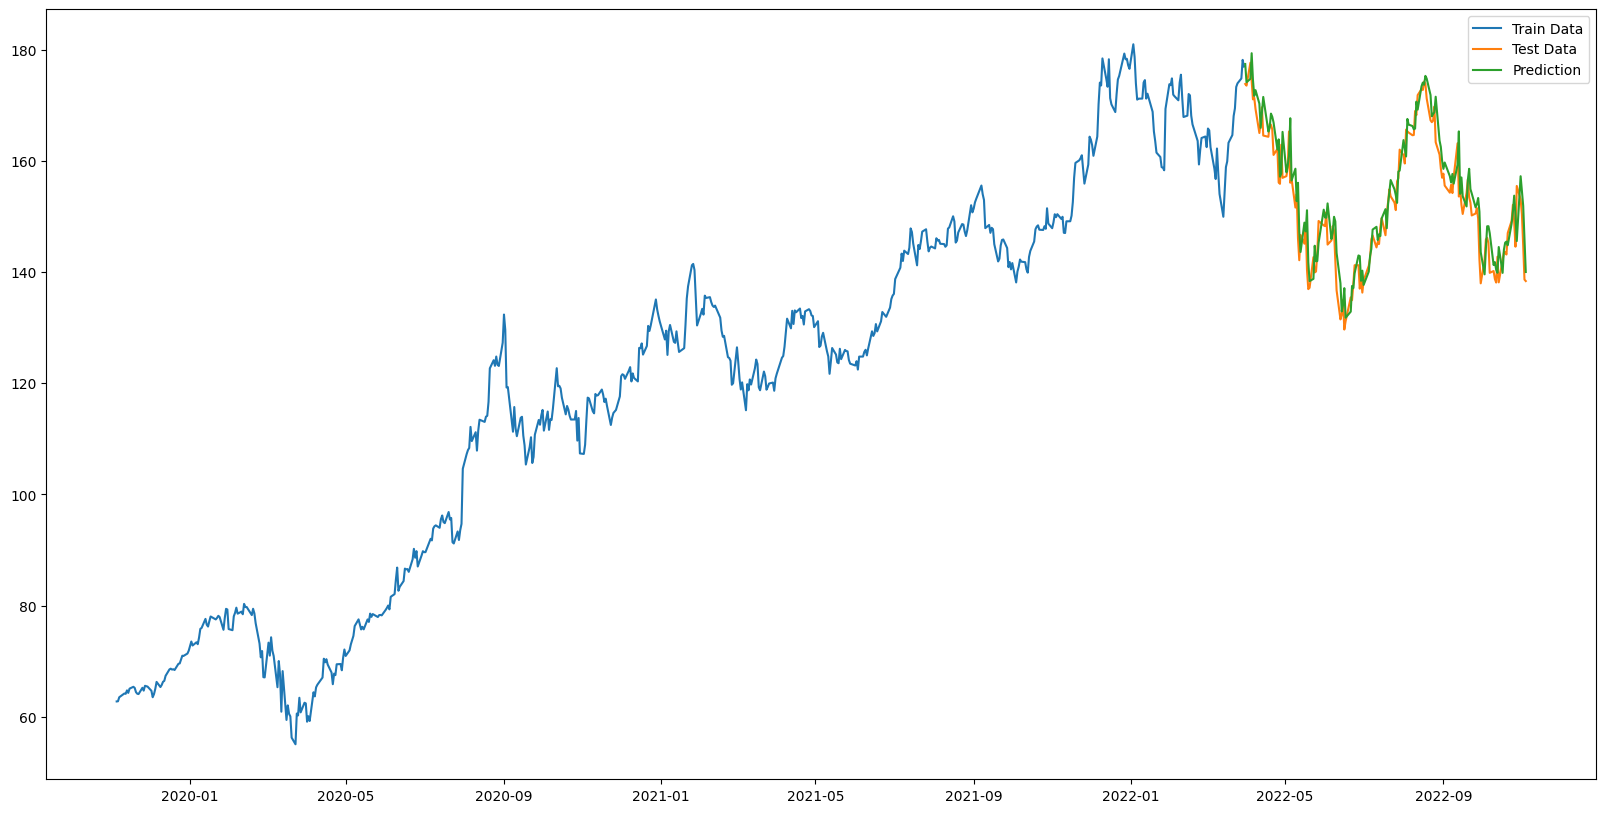

In [90]:
# Visualize the predicted stock costs with actual stock cost
train_data_price = aapl_historical_close[:train_test_split]
test_data_price = aapl_historical_close[train_test_split:]
test_data_price['Predictions'] = predicted_closing_price
plt.plot(train_data_price['Close'])
plt.plot(test_data_price['Close'])
plt.plot(test_data_price['Predictions'])
plt.legend(['Train Data', 'Test Data', 'Prediction'])

# plt.legend()
plt.show()


In [89]:
print("R-Squared Score: ", r2_score(test_data_price['Close'], test_data_price['Predictions']))
print("Mean Squared Error: ", mean_squared_error(test_data_price['Close'], test_data_price['Predictions']))
print("Mean Absolute Error: ", mean_absolute_error(test_data_price['Close'], test_data_price['Predictions']))

R-Squared Score:  0.8768100636051466
Mean Squared Error:  15.880330414066083
Mean Absolute Error:  3.087064894903841


/var/folders/kz/rvchp60d4w32sw9xqslynkzm0000gn/T/ipykernel_1122/3848354702.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_price['Predictions'] = predicted_closing_price
/var/folders/kz/rvchp60d4w32sw9xqslynkzm0000gn/T/ipykernel_1122/3848354702.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_price_correction['Predictions'] =  predicted_closing_price[1:]


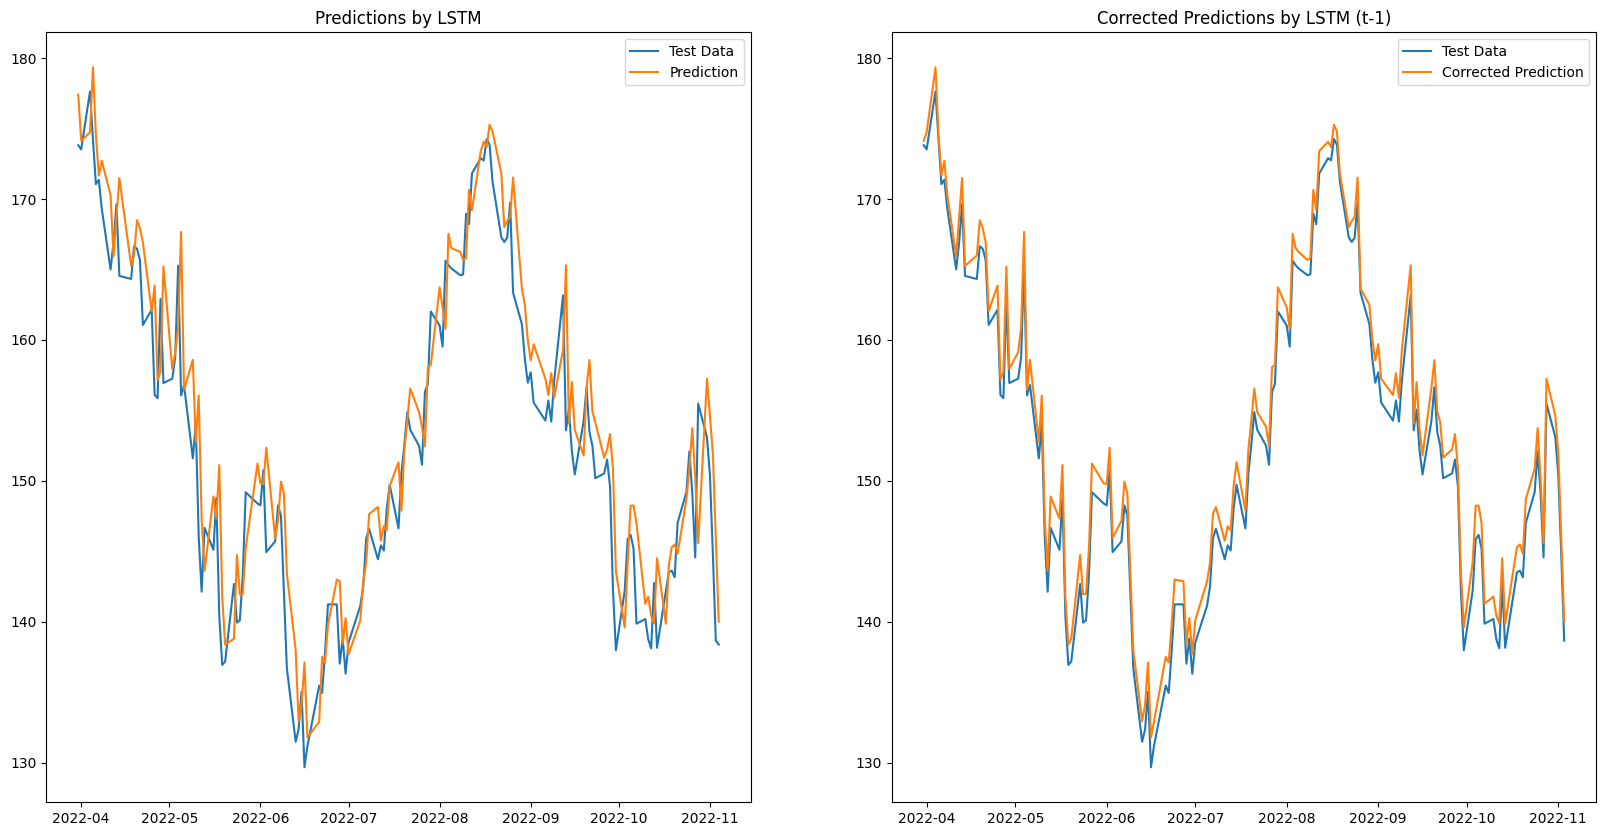

In [95]:
# Visualize the predicted stock costs with actual stock cost
fig, (ax1, ax2) = plt.subplots(1,2)

test_data_price = aapl_historical_close[train_test_split:]
test_data_price['Predictions'] = predicted_closing_price
ax1.set_title('Predictions by LSTM')
ax1.plot(test_data_price['Close'])
ax1.plot(test_data_price['Predictions'])
ax1.legend(['Test Data', 'Prediction'])

test_data_price_correction = test_data_price[:-1]
test_data_price_correction['Predictions'] =  predicted_closing_price[1:]
ax2.set_title('Corrected Predictions by LSTM (t-1)')
ax2.plot(test_data_price_correction['Close'])
ax2.plot(test_data_price_correction['Predictions'])
ax2.legend(['Test Data', 'Corrected Prediction'])


# plt.legend()
plt.show()


While the results of the model seem very good with r-squared value of 0.87681, we realised that the model might not be useful as it could just be predicting the closing price of day (t), as the closing price of the previous day, (t-1). 

Combined with our analysis of our trivial model where the model predicts the closing price of day (t) as the previous day (t-1), we realised that our decision to predict the closing price of day (t) is not very useful.

Hence, we refined our prediction to predict Stock Returns instead of Closing Stock Price. Predicting Stock Returns is more important than predicting Closing Stock price as the Stock Return will provide us the percentage increase of the Stock from the previous day and will let investors know whether the stock will increase or decrease in price. This indication will then help the investor, especially day traders, know whether to long or short the stock.

### Predicting Stock Returns using Closing Price and Volume Traded

We are able to predict the closing price, we will provide valuable information to investors as they will know whether to long or short the stock.


In [69]:
def getReturns(closingPrices):
  return pd.concat([pd.Series(np.nan), closingPrices.diff().reset_index(drop=True)[1:].reset_index(drop=True).div(closingPrices[:-1].reset_index(drop=True))]).reset_index(drop=True)

aapl_historical_returns = getReturns(aapl_historical['Close'])
aapl_historical_returns.index = aapl_historical.index
aapl_historical['Returns'] = aapl_historical_returns
aapl_historical = aapl_historical[1:]


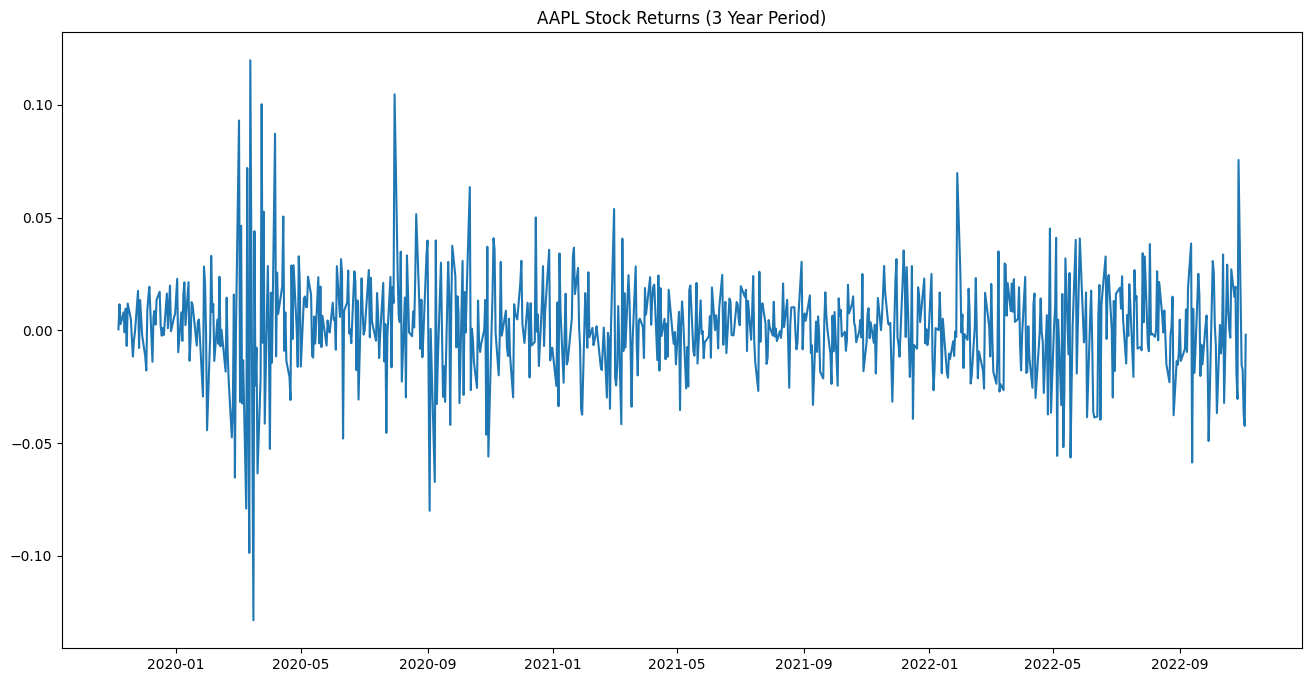

In [70]:
plt.figure(figsize=(16,8))
plt.plot(aapl_historical.index, aapl_historical["Returns"], label='AAPL Stock Returns 3 Year')
plt.title('AAPL Stock Returns (3 Year Period)')
plt.show()

### Choosing Returns over Close Price
Predicting Close Price is a trivial model as the model can just predict the exact same Closing Price of the previous day. i.e. model(t) = model(t-1) and there will be a high r-squared value.

Hence, we choose to predict returns instead of close price.

In [71]:
# Normalizing
# aapl_historical_returns = aapl_historical[['Returns']]
aapl_historical_returns = aapl_historical[['Returns', 'Close', 'Volume']] # Volume

# Spliting into Train and Test Data
train_test_split = int(len(aapl_historical_returns) * 0.8)
aapl_historical_train = aapl_historical_returns.iloc[:train_test_split]
aapl_historical_test = aapl_historical_returns.iloc[train_test_split:]

# Scaling based on Training Data
scaler_returns = MinMaxScaler(feature_range=(0,1))
scaled_returns_data = scaler_returns.fit_transform(aapl_historical_train) # scale only after split

x_train_data, y_train_data = [], []
num_input_points = 60

# Creating Training Data
for i in range(num_input_points, train_test_split):
    x_train_data.append(scaled_returns_data[i-num_input_points:i])
    y_train_data.append(scaled_returns_data[i, 0])

x_train_data, y_train_data = np.array(x_train_data), np.array(y_train_data)
x_train_data = np.reshape(x_train_data, (x_train_data.shape[0], x_train_data.shape[1], 3)) 

In [72]:
print(x_train_data.shape)
print(y_train_data.shape)

(544, 60, 3)
(544,)


In [73]:
# Continuous
# Building the LSTM Model
lstm_model_returns = Sequential()
lstm_model_returns.add(LSTM(units=100, return_sequences=True, input_shape=(x_train_data.shape[1], 3)))
lstm_model_returns.add(LSTM(units=100))
lstm_model_returns.add(Dense(25))
lstm_model_returns.add(Dense(1))
lstm_model_returns.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])
lstm_model_returns.fit(x_train_data,y_train_data,epochs=30,batch_size=1,verbose=1)

Epoch 1/30


2022-11-06 16:54:23.579315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-06 16:54:23.763417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-06 16:54:23.870505: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-06 16:54:23.996039: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  1/544 [..............................] - ETA: 15:39 - loss: 0.2771 - mean_squared_error: 0.2771

2022-11-06 16:54:24.171470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


544/544 [==============================] - 19s 32ms/step - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 2/30
544/544 [==============================] - 18s 32ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 3/30
544/544 [==============================] - 18s 33ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 4/30
544/544 [==============================] - 18s 32ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 5/30
544/544 [==============================] - 18s 32ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 6/30
544/544 [==============================] - 19s 34ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7/30
544/544 [==============================] - 18s 32ms/step - loss: 0.0094 - mean_squared_error: 0.0094
Epoch 8/30
544/544 [==============================] - 17s 32ms/step - loss: 0.0092 - mean_squared_error: 0.0092
Epoch 9/30
544/544 [==============================] - 17s 32ms/step - loss: 0.0094 - mean_squared_error: 0.0094
Epo

In [78]:
# Saving trained LSTM Model for Predicting Price

lstm_model_returns.save("LSTM_Model_Predicting_Stock_Returns_epoch30_batchsize1.h5")

### Preparing Test Data for Stock Returns

In [75]:
# Preparing Test data
test_input = aapl_historical_returns[train_test_split - num_input_points:]
test_input = scaler_returns.transform(test_input)

X_test = []
for i in range(num_input_points, test_input.shape[0]):
    X_test.append(test_input[i - num_input_points:i])
X_test = np.array(X_test)

predicted_closing_returns = lstm_model_returns.predict(X_test)
temp_column = np.zeros((predicted_closing_price.shape[0],2), dtype=int)
inverse_input = np.append(predicted_closing_returns, temp_column, axis=1)
predicted_closing_returns = scaler_returns.inverse_transform(inverse_input)[:,0]


5/5 [==============================] - 0s 23ms/step


/var/folders/kz/rvchp60d4w32sw9xqslynkzm0000gn/T/ipykernel_1122/530035970.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_returns['Predictions'] = predicted_closing_returns


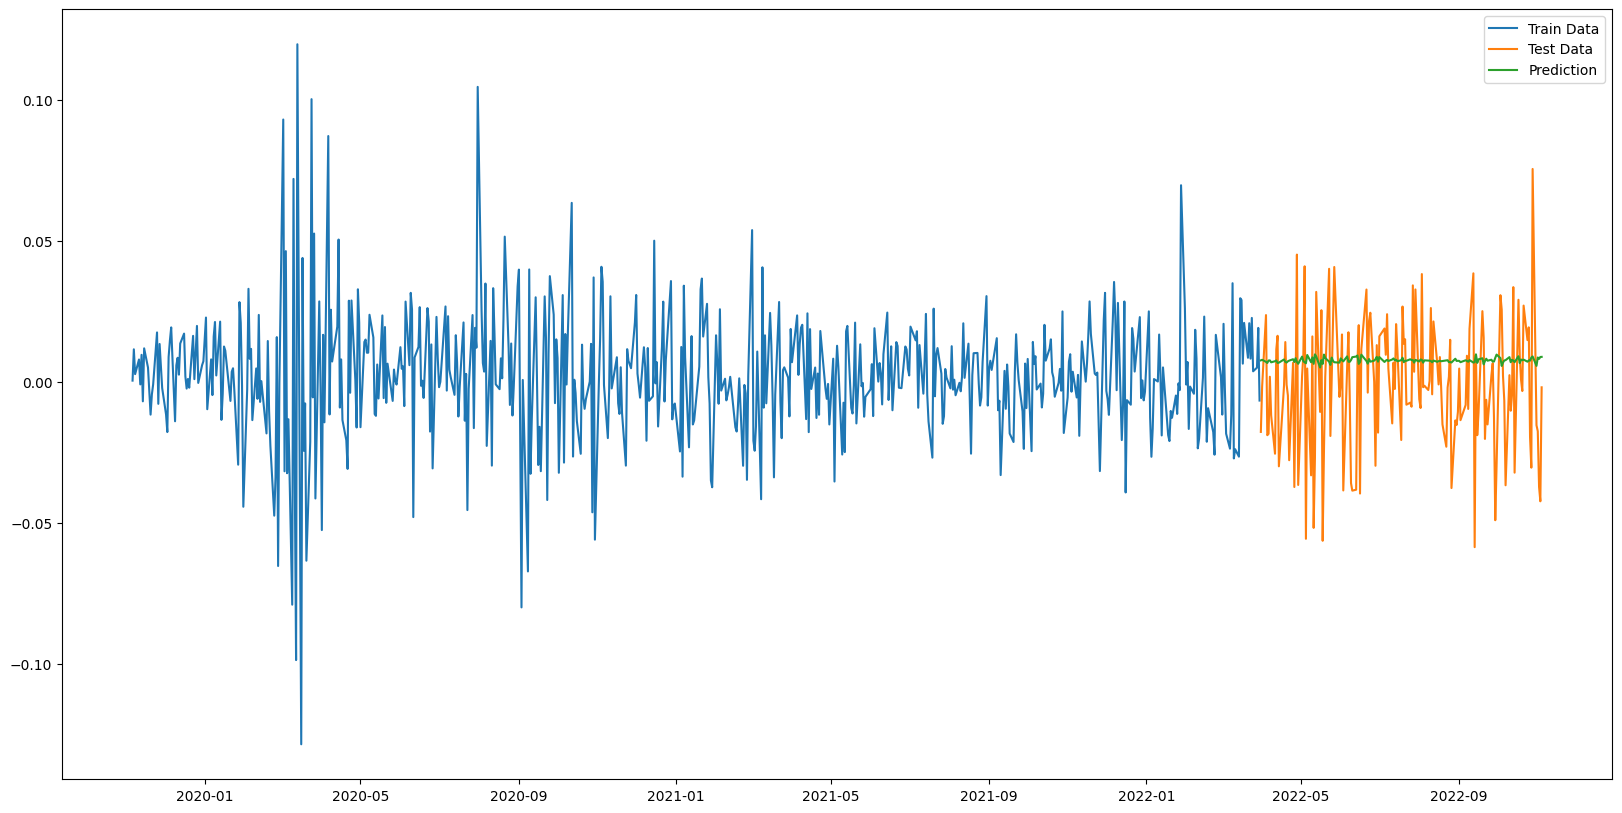

In [76]:
# Visualize the predicted stock costs with actual stock cost
train_data_returns = aapl_historical_returns[:train_test_split]
test_data_returns = aapl_historical_returns[train_test_split:]
test_data_returns['Predictions'] = predicted_closing_returns
plt.plot(train_data_returns['Returns'])
plt.plot(test_data_returns['Returns'])
plt.plot(test_data_returns['Predictions'])
plt.legend(['Train Data', 'Test Data', 'Prediction'])

# plt.legend()
plt.show()


In [77]:
print("R-Squared Score: ", r2_score(test_data_returns['Returns'], test_data_returns['Predictions']))
print("Mean Squared Error: ", mean_squared_error(test_data_returns['Returns'], test_data_returns['Predictions']))
print("Mean Absolute Error: ", mean_absolute_error(test_data_returns['Returns'], test_data_returns['Predictions']))

R-Squared Score:  -0.14346858442738664
Mean Squared Error:  0.0006201789400772203
Mean Absolute Error:  0.01968498302024791
